In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import h5py
import os
import sys

In [3]:
directory = '../result/'

ks, covs, es = [], [], []
for filename in os.listdir(directory):
    f = h5py.File(os.path.join(directory, filename), "r")
    
    print(filename, f['ks'].value, f['coverage'].value)
    
    ks.append(f['ks'].value)
    covs.append(f['coverage'].value)
    es.append(f['enn1'].value)
    f.close()

covs = np.array(covs)
ks = np.array(ks)
es = np.array(es)

/home/thj2009/bin/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:7: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  import sys
/home/thj2009/bin/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:9: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  if __name__ == '__main__':
/home/thj2009/bin/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:10: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  # Remove the CWD from sys.path while we load stuff.
/home/thj2009/bin/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:11: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  # This is added back by InteractiveShellApp.init_path()


rate_0.62_9.97.h5 [  1093.95219927 238273.33064741] [0.382 0.618]
rate_0.47_-1.14.h5 [0.27917618 0.16517844] [0.534 0.466]
rate_0.25_9.38.h5 [0.83510844 1.26387644] [0.7524 0.2476]
rate_0.72_-0.19.h5 [0.6326765  0.81937238] [0.2792 0.7208]
rate_0.79_-5.15.h5 [0.02199327 0.00196873] [0.2144 0.7856]
rate_0.77_6.06.h5 [ 102.08799722 6853.40071716] [0.2332 0.7668]
rate_0.85_-2.85.h5 [0.09064343 0.02605316] [0.1528 0.8472]
rate_0.10_7.21.h5 [0.14020042 0.03940053] [0.9024 0.0976]
rate_0.93_8.55.h5 [   2657.24574347 2039746.34901542] [0.0704 0.9296]
rate_0.02_0.10.h5 [0.01803147 0.00063439] [0.982 0.018]
rate_0.90_1.54.h5 [ 3.48742213 17.83853699] [0.1004 0.8996]
rate_0.74_-1.07.h5 [0.35082451 0.2817469 ] [0.2604 0.7396]
rate_0.42_9.55.h5 [ 4.20472664 18.06777916] [0.5792 0.4208]
rate_0.05_6.28.h5 [0.05893759 0.00691233] [0.95 0.05]
rate_0.88_-4.62.h5 [0.02199768 0.00216374] [0.1176 0.8824]
rate_0.05_-0.57.h5 [0.04479248 0.0039801 ] [0.954 0.046]
rate_0.37_-4.72.h5 [0.05948898 0.00838556] [0

rate_0.72_0.66.h5 [1.13400999 2.36448383] [0.2844 0.7156]
rate_0.74_1.42.h5 [2.09495655 7.18283398] [0.256 0.744]
rate_0.70_-0.00.h5 [0.70369543 0.99044972] [0.2956 0.7044]
rate_0.03_-8.45.h5 [0.01581936 0.00050118] [0.9676 0.0324]
rate_0.87_-3.57.h5 [0.05069543 0.00937735] [0.1328 0.8672]
rate_0.86_-6.11.h5 [0.00865739 0.00041838] [0.14 0.86]
rate_0.95_5.39.h5 [  143.59875231 12188.90200612] [0.0536 0.9464]
rate_0.89_-5.91.h5 [0.00839476 0.00040556] [0.1104 0.8896]
rate_0.63_8.30.h5 [  257.57080815 26279.88002592] [0.3664 0.6336]
rate_0.23_3.60.h5 [0.42497839 0.34659359] [0.7744 0.2256]
rate_0.24_-1.02.h5 [0.1873013  0.07115414] [0.76 0.24]
rate_0.45_-1.10.h5 [0.27825478 0.16309551] [0.5504 0.4496]
rate_0.12_-8.57.h5 [0.01484244 0.00048175] [0.878 0.122]
rate_0.95_-5.74.h5 [0.00638009 0.00026459] [0.0512 0.9488]
rate_0.75_4.14.h5 [ 18.43121212 342.6921851 ] [0.2476 0.7524]
rate_0.04_8.89.h5 [0.05228481 0.0053067 ] [0.9556 0.0444]
rate_0.72_3.95.h5 [ 13.51662513 198.50112056] [0.2772 0

In [15]:
print(min(es))

-9.758805365830824


In [5]:

X, y = [], []
for i in range(len(ks)):
    X.append([covs[i, 1], es[i] / 500.])

    y.append(np.log(ks[i, 0] / covs[i, 1]))
#         y.append(ks[i, idx])
#     y.append(pairs[i, idx])

X = np.array(X)
y = np.array(y).reshape(-1, 1)

In [6]:
# test NN prediction
from caslearn import NN
from sklearn.model_selection import train_test_split

# modelname = 'nn_lograte_' + str(pair_entry[idx]) + '.json'
# modelname = 'nn_rate_' + str(pair_entry[idx]) + '.json'
nn = NN(nin=2, nout=1, nhidden=3, nhDList=[3, 3, 3])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

nn.fit([X_train], [y_train])
nn.save_model('nn_lograte_enn1.json')

y_test_pred = nn.predict(X_test)
y_train_pred = nn.predict(X_train)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.13.2, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      703

Total number of variables............................:       37
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equa

  86  1.0943271e+01 0.00e+00 3.44e-01  -2.5 5.62e-02   0.3 1.00e+00 1.00e+00f  1
  87  1.0645298e+01 0.00e+00 1.41e+00  -2.5 1.73e-01  -0.2 1.00e+00 1.00e+00f  1
  88  1.0534098e+01 0.00e+00 3.17e+01  -2.5 6.06e-01  -0.7 1.00e+00 2.50e-01f  3
  89  1.0383746e+01 0.00e+00 1.12e-01  -2.5 2.73e-02   0.7 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  90  1.0268747e+01 0.00e+00 3.94e-01  -2.5 7.00e-02   0.2 1.00e+00 1.00e+00f  1
  91  9.9526211e+00 0.00e+00 3.98e+00  -2.5 2.02e-01  -0.3 1.00e+00 1.00e+00f  1
  92  9.7570397e+00 0.00e+00 1.31e+01  -2.5 7.40e-01  -0.8 1.00e+00 2.50e-01f  3
  93  9.6916854e+00 0.00e+00 7.74e-01  -2.5 2.56e-02   0.6 1.00e+00 1.00e+00f  1
  94  9.5718742e+00 0.00e+00 1.27e+00  -2.5 7.92e-02   0.1 1.00e+00 1.00e+00f  1
  95  9.2535717e+00 0.00e+00 7.02e+00  -2.5 2.34e-01  -0.4 1.00e+00 1.00e+00f  1
  96  9.1323070e+00 0.00e+00 4.28e-01  -2.5 8.93e-02   0.0 1.00e+00 1.00e+00f  1
  97  8.8481994e+00 0.00e+00

 218  7.4515033e-01 0.00e+00 2.44e-01  -3.8 1.33e-01  -1.3 1.00e+00 1.00e+00f  1
 219  7.1868031e-01 0.00e+00 2.18e+00  -3.8 3.56e-01  -1.8 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 220  7.1670084e-01 0.00e+00 1.97e-02  -3.8 1.72e-02  -0.4 1.00e+00 1.00e+00f  1
 221  7.1317200e-01 0.00e+00 6.84e-02  -3.8 5.00e-02  -0.9 1.00e+00 1.00e+00f  1
 222  7.0335696e-01 0.00e+00 5.13e-01  -3.8 1.43e-01  -1.4 1.00e+00 1.00e+00f  1
 223  7.0305790e-01 0.00e+00 5.10e-01  -3.8 9.98e+00  -1.9 1.00e+00 3.91e-03f  9
 224  6.9386454e-01 0.00e+00 3.50e+00  -3.8 1.51e-01  -1.4 1.00e+00 1.00e+00f  1
 225  6.9217376e-01 0.00e+00 5.52e-03  -3.8 7.21e-03  -0.1 1.00e+00 1.00e+00f  1
 226  6.9080721e-01 0.00e+00 1.30e-02  -3.8 2.12e-02  -0.6 1.00e+00 1.00e+00f  1
 227  6.8684288e-01 0.00e+00 1.27e-01  -3.8 6.22e-02  -1.1 1.00e+00 1.00e+00f  1
 228  6.7611342e-01 0.00e+00 8.06e-01  -3.8 1.75e-01  -1.5 1.00e+00 1.00e+00f  1
 229  6.7223826e-01 0.00e+00

 413  4.1460744e-01 0.00e+00 5.62e-01  -5.7 2.74e-01  -1.3 1.00e+00 1.25e-01f  4
 414  4.1386957e-01 0.00e+00 6.26e-02  -5.7 5.50e-02  -1.8 1.00e+00 1.00e+00f  1
 415  4.1321272e-01 0.00e+00 1.73e+00  -5.7 1.84e-01  -2.3 1.00e+00 5.00e-01f  2
 416  4.1270201e-01 0.00e+00 1.51e-03  -5.7 7.86e-03  -0.9 1.00e+00 1.00e+00f  1
 417  4.1242267e-01 0.00e+00 5.20e-02  -5.7 2.37e-02  -1.4 1.00e+00 1.00e+00f  1
 418  4.1162295e-01 0.00e+00 3.74e-01  -5.7 7.01e-02  -1.9 1.00e+00 1.00e+00f  1
 419  4.1130311e-01 0.00e+00 3.12e-02  -5.7 2.59e-02  -1.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 420  4.1043560e-01 0.00e+00 5.87e-01  -5.7 7.86e-02  -1.9 1.00e+00 1.00e+00f  1
 421  4.1005707e-01 0.00e+00 1.57e-02  -5.7 2.86e-02  -1.5 1.00e+00 1.00e+00f  1
 422  4.0913313e-01 0.00e+00 8.47e-01  -5.7 8.80e-02  -2.0 1.00e+00 1.00e+00f  1
 423  4.0866482e-01 0.00e+00 1.37e-01  -5.7 3.15e-02  -1.6 1.00e+00 1.00e+00f  1
 424  4.0817534e-01 0.00e+00

 660  2.6841406e-01 0.00e+00 5.21e-02  -5.7 1.95e-02  -1.8 1.00e+00 1.00e+00f  1
 661  2.6788921e-01 0.00e+00 2.85e-01  -5.7 5.73e-02  -2.2 1.00e+00 1.00e+00f  1
 662  2.6768194e-01 0.00e+00 4.07e-01  -5.7 2.41e-02  -1.8 1.00e+00 1.00e+00f  1
 663  2.6757112e-01 0.00e+00 9.83e-02  -5.7 6.67e-01  -2.3 1.00e+00 6.25e-02f  5
 664  2.6754554e-01 0.00e+00 6.41e-01  -5.7 1.32e+01  -2.8 1.00e+00 1.95e-03f 10
 665  2.6742017e-01 0.00e+00 1.21e-02  -5.7 9.19e-03  -1.4 1.00e+00 1.00e+00f  1
 666  2.6716226e-01 0.00e+00 1.35e-02  -5.7 2.66e-02  -1.9 1.00e+00 1.00e+00f  1
 667  2.6641735e-01 0.00e+00 2.62e-01  -5.7 8.11e-02  -2.4 1.00e+00 1.00e+00f  1
 668  2.6612293e-01 0.00e+00 9.94e-02  -5.7 3.02e-02  -2.0 1.00e+00 1.00e+00f  1
 669  2.6591060e-01 0.00e+00 5.70e-01  -5.7 1.19e-01  -2.4 1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 670  2.6560822e-01 0.00e+00 8.78e-01  -5.7 5.93e-02  -2.0 1.00e+00 1.00e+00f  1
 671  2.6550600e-01 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 830  2.0260274e-01 0.00e+00 2.55e-03  -5.7 4.69e-03  -1.6 1.00e+00 1.00e+00f  1
 831  2.0255697e-01 0.00e+00 3.68e-03  -5.7 1.37e-02  -2.1 1.00e+00 1.00e+00f  1
 832  2.0242351e-01 0.00e+00 3.25e-02  -5.7 3.97e-02  -2.5 1.00e+00 1.00e+00f  1
 833  2.0206792e-01 0.00e+00 2.54e-01  -5.7 1.18e-01  -3.0 1.00e+00 1.00e+00f  1
 834  2.0192691e-01 0.00e+00 3.43e-02  -5.7 4.38e-02  -2.6 1.00e+00 1.00e+00f  1
 835  2.0158091e-01 0.00e+00 6.75e-01  -5.7 1.31e-01  -3.1 1.00e+00 1.00e+00f  1
 836  2.0152991e-01 0.00e+00 3.66e-03  -5.7 6.13e-03  -1.7 1.00e+00 1.00e+00f  1
 837  2.0147800e-01 0.00e+00 1.08e-02  -5.7 1.84e-02  -2.2 1.00e+00 1.00e+00f  1
 838  2.0132761e-01 0.00e+00 7.54e-02  -5.7 5.48e-02  -2.7 1.00e+00 1.00e+00f  1
 839  2.0094374e-01 0.00e+00 2.71e-01  -5.7 1.61e-01  -3.2 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 840  2.0078500e-01 0.00e+00

1050  1.8418337e-01 0.00e+00 1.22e-03  -5.7 1.42e-02  -2.7 1.00e+00 1.00e+00f  1
1051  1.8416591e-01 0.00e+00 7.21e-03  -5.7 4.26e-02  -3.2 1.00e+00 1.00e+00f  1
1052  1.8411406e-01 0.00e+00 4.37e-02  -5.7 1.27e-01  -3.7 1.00e+00 1.00e+00f  1
1053  1.8396393e-01 0.00e+00 7.55e-02  -5.7 3.76e-01  -4.1 1.00e+00 1.00e+00f  1
1054  1.8391234e-01 0.00e+00 5.04e-01  -5.7 1.40e-01  -3.7 1.00e+00 1.00e+00f  1
1055  1.8390432e-01 0.00e+00 8.15e-04  -5.7 6.56e-03  -2.4 1.00e+00 1.00e+00f  1
1056  1.8389625e-01 0.00e+00 5.61e-03  -5.7 1.97e-02  -2.9 1.00e+00 1.00e+00f  1
1057  1.8387239e-01 0.00e+00 1.62e-02  -5.7 5.89e-02  -3.3 1.00e+00 1.00e+00f  1
1058  1.8380221e-01 0.00e+00 6.09e-02  -5.7 1.75e-01  -3.8 1.00e+00 1.00e+00f  1
1059  1.8362577e-01 0.00e+00 9.63e-01  -5.7 5.14e-01  -4.3 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1060  1.8359526e-01 0.00e+00 4.11e-04  -5.7 3.01e-03  -2.1 1.00e+00 1.00e+00f  1
1061  1.8359163e-01 0.00e+00

1278  1.7276342e-01 0.00e+00 4.11e-01  -5.7 4.75e-02  -3.1 1.00e+00 1.00e+00f  1
1279  1.7267400e-01 0.00e+00 2.77e-01  -5.7 1.20e-01  -3.6 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1280  1.7266217e-01 0.00e+00 2.12e-01  -5.7 2.29e-01  -3.2 1.00e+00 1.25e-01f  4
1281  1.7255985e-01 0.00e+00 1.92e-01  -5.7 1.36e-01  -3.6 1.00e+00 1.00e+00f  1
1282  1.7234920e-01 0.00e+00 6.17e-01  -5.7 3.21e-01  -4.1 1.00e+00 1.00e+00f  1
1283  1.7231296e-01 0.00e+00 1.92e-02  -5.7 5.69e-03  -1.9 1.00e+00 1.00e+00f  1
1284  1.7230074e-01 0.00e+00 3.38e-02  -5.7 1.38e-02  -2.4 1.00e+00 1.00e+00f  1
1285  1.7227249e-01 0.00e+00 1.43e-01  -5.7 3.01e-02  -2.8 1.00e+00 1.00e+00f  1
1286  1.7221181e-01 0.00e+00 3.34e-01  -5.7 7.24e-02  -3.3 1.00e+00 1.00e+00f  1
1287  1.7207946e-01 0.00e+00 9.86e-02  -5.7 1.75e-01  -3.8 1.00e+00 1.00e+00f  1
1288  1.7200287e-01 0.00e+00 4.12e-01  -5.7 1.68e+00  -4.3 1.00e+00 2.50e-01f  3
1289  1.7198320e-01 0.00e+00

1430  1.6377276e-01 0.00e+00 2.70e+00  -5.7 7.22e-01  -4.3 1.00e+00 1.00e+00f  1
1431  1.6361695e-01 0.00e+00 3.26e-03  -5.7 6.70e-03  -2.1 1.00e+00 1.00e+00f  1
1432  1.6360765e-01 0.00e+00 3.74e-02  -5.7 1.73e-02  -2.5 1.00e+00 1.00e+00f  1
1433  1.6358379e-01 0.00e+00 9.45e-02  -5.7 5.43e-02  -3.0 1.00e+00 1.00e+00f  1
1434  1.6351916e-01 0.00e+00 4.93e-02  -5.7 1.60e-01  -3.5 1.00e+00 1.00e+00f  1
1435  1.6336594e-01 0.00e+00 6.81e-02  -5.7 3.79e-01  -4.0 1.00e+00 1.00e+00f  1
1436  1.6329584e-01 0.00e+00 5.94e-02  -5.7 1.39e-01  -3.5 1.00e+00 1.00e+00f  1
1437  1.6315899e-01 0.00e+00 5.50e-01  -5.7 4.65e-01  -4.0 1.00e+00 1.00e+00f  1
1438  1.6309789e-01 0.00e+00 1.21e-01  -5.7 2.24e-02  -2.7 1.00e+00 1.00e+00f  1
1439  1.6306944e-01 0.00e+00 1.93e-02  -5.7 7.00e-02  -3.2 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1440  1.6299104e-01 0.00e+00 1.83e-01  -5.7 2.02e-01  -3.6 1.00e+00 1.00e+00f  1
1441  1.6283323e-01 0.00e+00

1861  1.4298495e-01 0.00e+00 2.51e+00  -5.7 1.92e+00  -5.4 1.00e+00 1.00e+00f  1
1862  1.4293964e-01 0.00e+00 2.72e-04  -5.7 1.54e-03  -2.2 1.00e+00 1.00e+00f  1
1863  1.4293917e-01 0.00e+00 1.70e-04  -5.7 4.38e-03  -2.7 1.00e+00 1.00e+00f  1
1864  1.4293777e-01 0.00e+00 1.04e-03  -5.7 1.32e-02  -3.2 1.00e+00 1.00e+00f  1
1865  1.4293361e-01 0.00e+00 4.98e-03  -5.7 3.92e-02  -3.7 1.00e+00 1.00e+00f  1
1866  1.4292123e-01 0.00e+00 1.14e-02  -5.7 1.17e-01  -4.1 1.00e+00 1.00e+00f  1
1867  1.4288449e-01 0.00e+00 2.80e-02  -5.7 3.48e-01  -4.6 1.00e+00 1.00e+00f  1
1868  1.4277768e-01 0.00e+00 2.18e-01  -5.7 1.04e+00  -5.1 1.00e+00 1.00e+00f  1
1869  1.4277153e-01 0.00e+00 8.68e-03  -5.7 4.75e-02  -3.8 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1870  1.4275642e-01 0.00e+00 7.45e-03  -5.7 1.44e-01  -4.2 1.00e+00 1.00e+00f  1
1871  1.4271146e-01 0.00e+00 5.70e-02  -5.7 4.30e-01  -4.7 1.00e+00 1.00e+00f  1
1872  1.4268437e-01 0.00e+00

2059  1.3833274e-01 0.00e+00 1.62e-01  -7.0 5.88e-01  -5.0 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2060  1.3833088e-01 0.00e+00 2.43e-04  -7.0 2.76e-02  -3.7 1.00e+00 1.00e+00f  1
2061  1.3832567e-01 0.00e+00 4.81e-03  -7.0 8.21e-02  -4.2 1.00e+00 1.00e+00f  1
2062  1.3831008e-01 0.00e+00 3.10e-02  -7.0 2.47e-01  -4.6 1.00e+00 1.00e+00f  1
2063  1.3826376e-01 0.00e+00 2.51e-02  -7.0 7.48e-01  -5.1 1.00e+00 1.00e+00f  1
2064  1.3813056e-01 0.00e+00 2.92e-01  -7.0 2.24e+00  -5.6 1.00e+00 1.00e+00f  1
2065  1.3812782e-01 0.00e+00 4.44e-03  -7.0 1.41e-02  -3.4 1.00e+00 1.00e+00f  1
2066  1.3812542e-01 0.00e+00 1.54e-03  -7.0 3.99e-02  -3.8 1.00e+00 1.00e+00f  1
2067  1.3811828e-01 0.00e+00 1.34e-03  -7.0 1.17e-01  -4.3 1.00e+00 1.00e+00f  1
2068  1.3809702e-01 0.00e+00 7.62e-02  -7.0 3.44e-01  -4.8 1.00e+00 1.00e+00f  1
2069  1.3808904e-01 0.00e+00 2.12e-02  -7.0 1.29e-01  -4.4 1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

2177  1.3655006e-01 0.00e+00 5.07e-03  -7.0 1.32e-01  -4.4 1.00e+00 1.00e+00f  1
2178  1.3653031e-01 0.00e+00 8.06e-02  -7.0 3.94e-01  -4.9 1.00e+00 1.00e+00f  1
2179  1.3652290e-01 0.00e+00 2.38e-02  -7.0 1.46e-01  -4.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2180  1.3650123e-01 0.00e+00 3.72e-01  -7.0 4.47e-01  -4.9 1.00e+00 1.00e+00f  1
2181  1.3650056e-01 0.00e+00 3.59e-05  -7.0 2.64e-03  -2.7 1.00e+00 1.00e+00f  1
2182  1.3650017e-01 0.00e+00 7.96e-05  -7.0 7.94e-03  -3.2 1.00e+00 1.00e+00f  1
2183  1.3649901e-01 0.00e+00 1.28e-04  -7.0 2.38e-02  -3.7 1.00e+00 1.00e+00f  1
2184  1.3649551e-01 0.00e+00 9.11e-04  -7.0 7.11e-02  -4.1 1.00e+00 1.00e+00f  1
2185  1.3648504e-01 0.00e+00 1.33e-02  -7.0 2.12e-01  -4.6 1.00e+00 1.00e+00f  1
2186  1.3645385e-01 0.00e+00 7.66e-02  -7.0 6.37e-01  -5.1 1.00e+00 1.00e+00f  1
2187  1.3645236e-01 0.00e+00 4.15e-04  -7.0 2.96e-02  -3.8 1.00e+00 1.00e+00f  1
2188  1.3644797e-01 0.00e+00

2366  1.3435411e-01 0.00e+00 1.40e-02  -7.0 1.11e-02  -3.4 1.00e+00 1.00e+00f  1
2367  1.3435280e-01 0.00e+00 3.25e-02  -7.0 3.26e-02  -3.9 1.00e+00 1.00e+00f  1
2368  1.3434903e-01 0.00e+00 2.27e-02  -7.0 9.47e-02  -4.3 1.00e+00 1.00e+00f  1
2369  1.3433785e-01 0.00e+00 6.40e-02  -7.0 2.83e-01  -4.8 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2370  1.3433371e-01 0.00e+00 1.36e-01  -7.0 1.14e-01  -4.4 1.00e+00 1.00e+00f  1
2371  1.3433208e-01 0.00e+00 7.84e-03  -7.0 4.12e-02  -4.0 1.00e+00 1.00e+00f  1
2372  1.3432737e-01 0.00e+00 3.90e-03  -7.0 1.20e-01  -4.4 1.00e+00 1.00e+00f  1
2373  1.3431329e-01 0.00e+00 6.47e-02  -7.0 3.60e-01  -4.9 1.00e+00 1.00e+00f  1
2374  1.3430801e-01 0.00e+00 2.82e-04  -7.0 1.38e-01  -4.5 1.00e+00 1.00e+00f  1
2375  1.3429224e-01 0.00e+00 7.69e-02  -7.0 4.05e-01  -5.0 1.00e+00 1.00e+00f  1
2376  1.3429148e-01 0.00e+00 1.07e-04  -7.0 1.90e-02  -3.6 1.00e+00 1.00e+00f  1
2377  1.3428926e-01 0.00e+00

2539  1.3295160e-01 0.00e+00 3.49e-04  -7.0 2.26e-02  -3.7 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2540  1.3294929e-01 0.00e+00 2.17e-03  -7.0 6.70e-02  -4.2 1.00e+00 1.00e+00f  1
2541  1.3294236e-01 0.00e+00 1.63e-02  -7.0 2.01e-01  -4.7 1.00e+00 1.00e+00f  1
2542  1.3292167e-01 0.00e+00 4.39e-02  -7.0 6.09e-01  -5.2 1.00e+00 1.00e+00f  1
2543  1.3291390e-01 0.00e+00 3.62e-03  -7.0 2.26e-01  -4.7 1.00e+00 1.00e+00f  1
2544  1.3289083e-01 0.00e+00 1.84e-01  -7.0 6.74e-01  -5.2 1.00e+00 1.00e+00f  1
2545  1.3289054e-01 0.00e+00 1.51e-05  -7.0 3.94e-03  -3.0 1.00e+00 1.00e+00f  1
2546  1.3289013e-01 0.00e+00 1.13e-04  -7.0 1.18e-02  -3.5 1.00e+00 1.00e+00f  1
2547  1.3288890e-01 0.00e+00 8.56e-04  -7.0 3.54e-02  -3.9 1.00e+00 1.00e+00f  1
2548  1.3288523e-01 0.00e+00 6.67e-03  -7.0 1.06e-01  -4.4 1.00e+00 1.00e+00f  1
2549  1.3287425e-01 0.00e+00 4.13e-02  -7.0 3.20e-01  -4.9 1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

2633  1.3239655e-01 0.00e+00 1.30e-02  -7.0 1.10e-02  -3.4 1.00e+00 1.00e+00f  1
2634  1.3239546e-01 0.00e+00 2.87e-02  -7.0 3.24e-02  -3.9 1.00e+00 1.00e+00f  1
2635  1.3239226e-01 0.00e+00 1.41e-02  -7.0 9.58e-02  -4.4 1.00e+00 1.00e+00f  1
2636  1.3238276e-01 0.00e+00 5.49e-02  -7.0 2.88e-01  -4.9 1.00e+00 1.00e+00f  1
2637  1.3237923e-01 0.00e+00 1.05e-01  -7.0 1.12e-01  -4.4 1.00e+00 1.00e+00f  1
2638  1.3237785e-01 0.00e+00 6.00e-03  -7.0 4.18e-02  -4.0 1.00e+00 1.00e+00f  1
2639  1.3237384e-01 0.00e+00 8.95e-04  -7.0 1.22e-01  -4.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2640  1.3236187e-01 0.00e+00 7.47e-02  -7.0 3.62e-01  -5.0 1.00e+00 1.00e+00f  1
2641  1.3236129e-01 0.00e+00 9.88e-05  -7.0 1.70e-02  -3.6 1.00e+00 1.00e+00f  1
2642  1.3235960e-01 0.00e+00 1.42e-03  -7.0 5.09e-02  -4.1 1.00e+00 1.00e+00f  1
2643  1.3235455e-01 0.00e+00 1.18e-02  -7.0 1.53e-01  -4.6 1.00e+00 1.00e+00f  1
2644  1.3233945e-01 0.00e+00

2733  1.3175759e-01 0.00e+00 5.58e-02  -7.0 4.63e-01  -5.1 1.00e+00 1.00e+00f  1
2734  1.3175689e-01 0.00e+00 3.75e-04  -7.0 2.17e-02  -3.8 1.00e+00 1.00e+00f  1
2735  1.3175485e-01 0.00e+00 3.30e-03  -7.0 6.52e-02  -4.2 1.00e+00 1.00e+00f  1
2736  1.3174874e-01 0.00e+00 2.11e-02  -7.0 1.95e-01  -4.7 1.00e+00 1.00e+00f  1
2737  1.3173047e-01 0.00e+00 4.16e-02  -7.0 5.88e-01  -5.2 1.00e+00 1.00e+00f  1
2738  1.3172362e-01 0.00e+00 1.75e-02  -7.0 2.19e-01  -4.8 1.00e+00 1.00e+00f  1
2739  1.3170721e-01 0.00e+00 1.26e+00  -7.0 6.84e-01  -5.2 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2740  1.3170299e-01 0.00e+00 9.72e-05  -7.0 4.89e-04  -2.1 1.00e+00 1.00e+00f  1
2741  1.3170295e-01 0.00e+00 6.63e-05  -7.0 1.48e-03  -2.6 1.00e+00 1.00e+00f  1
2742  1.3170281e-01 0.00e+00 1.34e-04  -7.0 4.43e-03  -3.1 1.00e+00 1.00e+00f  1
2743  1.3170240e-01 0.00e+00 3.10e-04  -7.0 1.33e-02  -3.5 1.00e+00 1.00e+00f  1
2744  1.3170118e-01 0.00e+00

2850  1.3111693e-01 0.00e+00 2.95e-03  -7.0 3.06e-01  -4.9 1.00e+00 1.00e+00f  1
2851  1.3109021e-01 0.00e+00 1.37e-01  -7.0 9.08e-01  -5.4 1.00e+00 1.00e+00f  1
2852  1.3108997e-01 0.00e+00 7.57e-05  -7.0 5.30e-03  -3.2 1.00e+00 1.00e+00f  1
2853  1.3108950e-01 0.00e+00 1.00e-04  -7.0 1.58e-02  -3.6 1.00e+00 1.00e+00f  1
2854  1.3108808e-01 0.00e+00 8.47e-04  -7.0 4.74e-02  -4.1 1.00e+00 1.00e+00f  1
2855  1.3108385e-01 0.00e+00 7.98e-03  -7.0 1.42e-01  -4.6 1.00e+00 1.00e+00f  1
2856  1.3107118e-01 0.00e+00 4.62e-02  -7.0 4.28e-01  -5.1 1.00e+00 1.00e+00f  1
2857  1.3106642e-01 0.00e+00 2.97e-03  -7.0 1.61e-01  -4.6 1.00e+00 1.00e+00f  1
2858  1.3105223e-01 0.00e+00 1.05e-01  -7.0 4.77e-01  -5.1 1.00e+00 1.00e+00f  1
2859  1.3105153e-01 0.00e+00 7.54e-04  -7.0 2.26e-02  -3.8 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2860  1.3104953e-01 0.00e+00 3.14e-03  -7.0 6.75e-02  -4.3 1.00e+00 1.00e+00f  1
2861  1.3104353e-01 0.00e+00

3029  1.3024941e-01 0.00e+00 1.55e-04  -7.0 1.87e-03  -2.7 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3030  1.3024926e-01 0.00e+00 5.51e-04  -7.0 5.61e-03  -3.2 1.00e+00 1.00e+00f  1
3031  1.3024880e-01 0.00e+00 1.46e-03  -7.0 1.69e-02  -3.7 1.00e+00 1.00e+00f  1
3032  1.3024744e-01 0.00e+00 1.92e-03  -7.0 5.05e-02  -4.2 1.00e+00 1.00e+00f  1
3033  1.3024337e-01 0.00e+00 5.89e-04  -7.0 1.49e-01  -4.6 1.00e+00 1.00e+00f  1
3034  1.3023120e-01 0.00e+00 2.96e-02  -7.0 4.41e-01  -5.1 1.00e+00 1.00e+00f  1
3035  1.3021795e-01 0.00e+00 1.42e+00  -7.0 1.41e+00  -5.6 1.00e+00 5.00e-01f  2
3036  1.3021316e-01 0.00e+00 4.01e-03  -7.0 1.28e-03  -2.4 1.00e+00 1.00e+00f  1
3037  1.3021306e-01 0.00e+00 2.61e-03  -7.0 3.15e-03  -2.9 1.00e+00 1.00e+00f  1
3038  1.3021279e-01 0.00e+00 1.49e-02  -7.0 9.49e-03  -3.4 1.00e+00 1.00e+00f  1
3039  1.3021205e-01 0.00e+00 2.95e-02  -7.0 2.77e-02  -3.9 1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

3137  1.2974654e-01 0.00e+00 7.23e-03  -7.0 1.69e-02  -3.7 1.00e+00 1.00e+00f  1
3138  1.2974529e-01 0.00e+00 1.77e-03  -7.0 4.83e-02  -4.2 1.00e+00 1.00e+00f  1
3139  1.2974152e-01 0.00e+00 1.98e-02  -7.0 1.44e-01  -4.6 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3140  1.2973026e-01 0.00e+00 4.39e-02  -7.0 4.21e-01  -5.1 1.00e+00 1.00e+00f  1
3141  1.2972604e-01 0.00e+00 5.33e-02  -7.0 1.62e-01  -4.7 1.00e+00 1.00e+00f  1
3142  1.2972445e-01 0.00e+00 8.41e-03  -7.0 6.18e-02  -4.3 1.00e+00 1.00e+00f  1
3143  1.2971970e-01 0.00e+00 1.81e-02  -7.0 1.78e-01  -4.7 1.00e+00 1.00e+00f  1
3144  1.2970639e-01 0.00e+00 6.57e-01  -7.0 5.52e-01  -5.2 1.00e+00 1.00e+00f  1
3145  1.2970544e-01 0.00e+00 1.12e-05  -7.0 3.94e-04  -2.1 1.00e+00 1.00e+00f  1
3146  1.2970541e-01 0.00e+00 1.78e-05  -7.0 1.18e-03  -2.6 1.00e+00 1.00e+00f  1
3147  1.2970532e-01 0.00e+00 1.04e-04  -7.0 3.55e-03  -3.0 1.00e+00 1.00e+00f  1
3148  1.2970503e-01 0.00e+00

3360  1.2880257e-01 0.00e+00 8.51e-03  -7.0 8.08e-02  -4.4 1.00e+00 1.00e+00f  1
3361  1.2879674e-01 0.00e+00 3.71e-02  -7.0 2.40e-01  -4.9 1.00e+00 1.00e+00f  1
3362  1.2879455e-01 0.00e+00 4.06e-03  -7.0 8.95e-02  -4.5 1.00e+00 1.00e+00f  1
3363  1.2878799e-01 0.00e+00 5.22e-02  -7.0 2.70e-01  -4.9 1.00e+00 1.00e+00f  1
3364  1.2878768e-01 0.00e+00 1.31e-04  -7.0 1.27e-02  -3.6 1.00e+00 1.00e+00f  1
3365  1.2878676e-01 0.00e+00 1.35e-03  -7.0 3.80e-02  -4.1 1.00e+00 1.00e+00f  1
3366  1.2878399e-01 0.00e+00 9.89e-03  -7.0 1.14e-01  -4.6 1.00e+00 1.00e+00f  1
3367  1.2877572e-01 0.00e+00 5.04e-02  -7.0 3.38e-01  -5.0 1.00e+00 1.00e+00f  1
3368  1.2877532e-01 0.00e+00 2.44e-04  -7.0 1.60e-02  -3.7 1.00e+00 1.00e+00f  1
3369  1.2877416e-01 0.00e+00 2.23e-03  -7.0 4.81e-02  -4.2 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3370  1.2877067e-01 0.00e+00 1.48e-02  -7.0 1.44e-01  -4.7 1.00e+00 1.00e+00f  1
3371  1.2876023e-01 0.00e+00

3549  1.2812947e-01 0.00e+00 3.38e-03  -7.0 5.56e-02  -4.3 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3550  1.2812566e-01 0.00e+00 1.99e-02  -7.0 1.66e-01  -4.8 1.00e+00 1.00e+00f  1
3551  1.2811427e-01 0.00e+00 5.25e-02  -7.0 4.90e-01  -5.2 1.00e+00 1.00e+00f  1
3552  1.2811373e-01 0.00e+00 9.99e-05  -7.0 2.33e-02  -3.9 1.00e+00 1.00e+00f  1
3553  1.2811213e-01 0.00e+00 6.68e-03  -7.0 7.06e-02  -4.4 1.00e+00 1.00e+00f  1
3554  1.2810732e-01 0.00e+00 3.05e-02  -7.0 2.10e-01  -4.9 1.00e+00 1.00e+00f  1
3555  1.2810552e-01 0.00e+00 3.35e-03  -7.0 7.85e-02  -4.4 1.00e+00 1.00e+00f  1
3556  1.2810012e-01 0.00e+00 4.11e-02  -7.0 2.36e-01  -4.9 1.00e+00 1.00e+00f  1
3557  1.2809810e-01 0.00e+00 4.56e-04  -7.0 8.82e-02  -4.5 1.00e+00 1.00e+00f  1
3558  1.2809204e-01 0.00e+00 5.27e-02  -7.0 2.65e-01  -5.0 1.00e+00 1.00e+00f  1
3559  1.2809175e-01 0.00e+00 8.62e-05  -7.0 1.24e-02  -3.6 1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

3650  1.2779421e-01 0.00e+00 1.86e-04  -7.0 1.42e-02  -3.7 1.00e+00 1.00e+00f  1
3651  1.2779326e-01 0.00e+00 1.77e-03  -7.0 4.27e-02  -4.2 1.00e+00 1.00e+00f  1
3652  1.2779043e-01 0.00e+00 1.22e-02  -7.0 1.28e-01  -4.7 1.00e+00 1.00e+00f  1
3653  1.2778194e-01 0.00e+00 5.14e-02  -7.0 3.79e-01  -5.1 1.00e+00 1.00e+00f  1
3654  1.2778153e-01 0.00e+00 2.55e-04  -7.0 1.79e-02  -3.8 1.00e+00 1.00e+00f  1
3655  1.2778034e-01 0.00e+00 3.21e-03  -7.0 5.40e-02  -4.3 1.00e+00 1.00e+00f  1
3656  1.2777676e-01 0.00e+00 1.89e-02  -7.0 1.61e-01  -4.8 1.00e+00 1.00e+00f  1
3657  1.2776605e-01 0.00e+00 5.14e-02  -7.0 4.77e-01  -5.2 1.00e+00 1.00e+00f  1
3658  1.2776554e-01 0.00e+00 7.53e-04  -7.0 2.26e-02  -3.9 1.00e+00 1.00e+00f  1
3659  1.2776403e-01 0.00e+00 6.43e-03  -7.0 6.86e-02  -4.4 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3660  1.2775951e-01 0.00e+00 2.90e-02  -7.0 2.04e-01  -4.9 1.00e+00 1.00e+00f  1
3661  1.2775849e-01 0.00e+00

3937  1.2690182e-01 0.00e+00 1.31e-03  -7.0 4.75e-02  -4.3 1.00e+00 1.00e+00f  1
3938  1.2689891e-01 0.00e+00 1.12e-02  -7.0 1.43e-01  -4.7 1.00e+00 1.00e+00f  1
3939  1.2689018e-01 0.00e+00 4.94e-02  -7.0 4.24e-01  -5.2 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3940  1.2688976e-01 0.00e+00 1.81e-04  -7.0 2.00e-02  -3.9 1.00e+00 1.00e+00f  1
3941  1.2688854e-01 0.00e+00 3.82e-03  -7.0 6.05e-02  -4.4 1.00e+00 1.00e+00f  1
3942  1.2688486e-01 0.00e+00 2.10e-02  -7.0 1.81e-01  -4.8 1.00e+00 1.00e+00f  1
3943  1.2687385e-01 0.00e+00 3.66e-02  -7.0 5.34e-01  -5.3 1.00e+00 1.00e+00f  1
3944  1.2687333e-01 0.00e+00 1.79e-02  -7.0 2.51e-02  -4.0 1.00e+00 1.00e+00f  1
3945  1.2687178e-01 0.00e+00 1.25e-02  -7.0 7.76e-02  -4.5 1.00e+00 1.00e+00f  1
3946  1.2686714e-01 0.00e+00 2.49e-02  -7.0 2.28e-01  -5.0 1.00e+00 1.00e+00f  1
3947  1.2685330e-01 0.00e+00 6.74e-02  -7.0 6.76e-01  -5.4 1.00e+00 1.00e+00f  1
3948  1.2685263e-01 0.00e+00

4059  1.2655374e-01 0.00e+00 2.10e-04  -7.0 1.49e-02  -3.8 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4060  1.2655287e-01 0.00e+00 7.67e-04  -7.0 4.44e-02  -4.3 1.00e+00 1.00e+00f  1
4061  1.2655026e-01 0.00e+00 1.11e-02  -7.0 1.33e-01  -4.7 1.00e+00 1.00e+00f  1
4062  1.2654244e-01 0.00e+00 4.84e-02  -7.0 3.95e-01  -5.2 1.00e+00 1.00e+00f  1
4063  1.2654207e-01 0.00e+00 1.08e-04  -7.0 1.86e-02  -3.9 1.00e+00 1.00e+00f  1
4064  1.2654097e-01 0.00e+00 3.49e-03  -7.0 5.63e-02  -4.4 1.00e+00 1.00e+00f  1
4065  1.2653768e-01 0.00e+00 1.94e-02  -7.0 1.68e-01  -4.8 1.00e+00 1.00e+00f  1
4066  1.2652782e-01 0.00e+00 3.56e-02  -7.0 4.97e-01  -5.3 1.00e+00 1.00e+00f  1
4067  1.2652735e-01 0.00e+00 1.50e-02  -7.0 2.33e-02  -4.0 1.00e+00 1.00e+00f  1
4068  1.2652596e-01 0.00e+00 1.00e-02  -7.0 7.19e-02  -4.5 1.00e+00 1.00e+00f  1
4069  1.2652180e-01 0.00e+00 2.44e-02  -7.0 2.12e-01  -4.9 1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

4253  1.2605229e-01 0.00e+00 1.30e-04  -7.0 4.85e-03  -3.3 1.00e+00 1.00e+00f  1
4254  1.2605202e-01 0.00e+00 8.06e-04  -7.0 1.45e-02  -3.8 1.00e+00 1.00e+00f  1
4255  1.2605121e-01 0.00e+00 1.27e-03  -7.0 4.33e-02  -4.3 1.00e+00 1.00e+00f  1
4256  1.2604877e-01 0.00e+00 3.92e-03  -7.0 1.30e-01  -4.8 1.00e+00 1.00e+00f  1
4257  1.2604147e-01 0.00e+00 5.28e-02  -7.0 3.89e-01  -5.2 1.00e+00 1.00e+00f  1
4258  1.2604112e-01 0.00e+00 8.82e-05  -7.0 1.83e-02  -3.9 1.00e+00 1.00e+00f  1
4259  1.2604009e-01 0.00e+00 1.96e-03  -7.0 5.50e-02  -4.4 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4260  1.2603701e-01 0.00e+00 1.43e-02  -7.0 1.65e-01  -4.9 1.00e+00 1.00e+00f  1
4261  1.2602781e-01 0.00e+00 4.00e-02  -7.0 4.90e-01  -5.3 1.00e+00 1.00e+00f  1
4262  1.2602737e-01 0.00e+00 8.70e-03  -7.0 2.30e-02  -4.0 1.00e+00 1.00e+00f  1
4263  1.2602607e-01 0.00e+00 6.60e-03  -7.0 7.05e-02  -4.5 1.00e+00 1.00e+00f  1
4264  1.2602219e-01 0.00e+00

4431  1.2564420e-01 0.00e+00 7.17e-03  -7.0 4.12e-02  -4.3 1.00e+00 1.00e+00f  1
4432  1.2564206e-01 0.00e+00 3.48e-03  -7.0 1.22e-01  -4.7 1.00e+00 1.00e+00f  1
4433  1.2563567e-01 0.00e+00 7.03e-02  -7.0 3.61e-01  -5.2 1.00e+00 1.00e+00f  1
4434  1.2563562e-01 0.00e+00 5.72e-06  -7.0 2.12e-03  -3.0 1.00e+00 1.00e+00f  1
4435  1.2563551e-01 0.00e+00 4.55e-05  -7.0 6.38e-03  -3.5 1.00e+00 1.00e+00f  1
4436  1.2563517e-01 0.00e+00 3.41e-04  -7.0 1.91e-02  -3.9 1.00e+00 1.00e+00f  1
4437  1.2563416e-01 0.00e+00 2.70e-03  -7.0 5.73e-02  -4.4 1.00e+00 1.00e+00f  1
4438  1.2563113e-01 0.00e+00 1.91e-02  -7.0 1.71e-01  -4.9 1.00e+00 1.00e+00f  1
4439  1.2562206e-01 0.00e+00 3.50e-03  -7.0 5.07e-01  -5.4 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4440  1.2561294e-01 0.00e+00 1.88e-01  -7.0 1.59e+00  -5.8 1.00e+00 5.00e-01f  2
4441  1.2560828e-01 0.00e+00 6.47e-03  -7.0 9.89e-03  -3.6 1.00e+00 1.00e+00f  1
4442  1.2560779e-01 0.00e+00

4617  1.2519004e-01 0.00e+00 2.85e-02  -7.0 5.19e-01  -5.4 1.00e+00 1.00e+00f  1
4618  1.2518962e-01 0.00e+00 1.82e-02  -7.0 2.43e-02  -4.1 1.00e+00 1.00e+00f  1
4619  1.2518838e-01 0.00e+00 1.04e-02  -7.0 7.49e-02  -4.6 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4620  1.2518467e-01 0.00e+00 1.56e-02  -7.0 2.21e-01  -5.0 1.00e+00 1.00e+00f  1
4621  1.2517357e-01 0.00e+00 6.81e-02  -7.0 6.56e-01  -5.5 1.00e+00 1.00e+00f  1
4622  1.2517350e-01 0.00e+00 9.93e-05  -7.0 3.93e-03  -3.3 1.00e+00 1.00e+00f  1
4623  1.2517330e-01 0.00e+00 5.01e-04  -7.0 1.18e-02  -3.8 1.00e+00 1.00e+00f  1
4624  1.2517271e-01 0.00e+00 2.54e-03  -7.0 3.55e-02  -4.2 1.00e+00 1.00e+00f  1
4625  1.2517096e-01 0.00e+00 1.31e-02  -7.0 1.06e-01  -4.7 1.00e+00 1.00e+00f  1
4626  1.2516570e-01 0.00e+00 3.28e-02  -7.0 3.13e-01  -5.2 1.00e+00 1.00e+00f  1
4627  1.2516545e-01 0.00e+00 1.18e-03  -7.0 1.47e-02  -3.9 1.00e+00 1.00e+00f  1
4628  1.2516471e-01 0.00e+00

4728  1.2497901e-01 0.00e+00 5.45e-05  -7.0 3.78e-03  -3.3 1.00e+00 1.00e+00f  1
4729  1.2497883e-01 0.00e+00 1.68e-04  -7.0 1.14e-02  -3.8 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4730  1.2497827e-01 0.00e+00 1.31e-03  -7.0 3.43e-02  -4.2 1.00e+00 1.00e+00f  1
4731  1.2497660e-01 0.00e+00 8.70e-03  -7.0 1.03e-01  -4.7 1.00e+00 1.00e+00f  1
4732  1.2497160e-01 0.00e+00 3.24e-02  -7.0 3.05e-01  -5.2 1.00e+00 1.00e+00f  1
4733  1.2497136e-01 0.00e+00 9.89e-05  -7.0 1.44e-02  -3.9 1.00e+00 1.00e+00f  1
4734  1.2497066e-01 0.00e+00 2.15e-03  -7.0 4.33e-02  -4.3 1.00e+00 1.00e+00f  1
4735  1.2496855e-01 0.00e+00 1.24e-02  -7.0 1.30e-01  -4.8 1.00e+00 1.00e+00f  1
4736  1.2496223e-01 0.00e+00 3.13e-02  -7.0 3.85e-01  -5.3 1.00e+00 1.00e+00f  1
4737  1.2496193e-01 0.00e+00 3.33e-03  -7.0 1.81e-02  -4.0 1.00e+00 1.00e+00f  1
4738  1.2496105e-01 0.00e+00 4.31e-03  -7.0 5.50e-02  -4.4 1.00e+00 1.00e+00f  1
4739  1.2495838e-01 0.00e+00

4881  1.2467223e-01 0.00e+00 3.30e-01  -7.0 1.64e-01  -4.9 1.00e+00 5.00e-01f  2
4882  1.2467206e-01 0.00e+00 1.47e-04  -7.0 9.92e-04  -2.7 1.00e+00 1.00e+00f  1
4883  1.2467202e-01 0.00e+00 2.85e-03  -7.0 3.01e-03  -3.2 1.00e+00 1.00e+00f  1
4884  1.2467188e-01 0.00e+00 9.00e-03  -7.0 8.96e-03  -3.7 1.00e+00 1.00e+00f  1
4885  1.2467147e-01 0.00e+00 1.21e-02  -7.0 2.65e-02  -4.1 1.00e+00 1.00e+00f  1
4886  1.2467025e-01 0.00e+00 1.52e-03  -7.0 7.89e-02  -4.6 1.00e+00 1.00e+00f  1
4887  1.2466661e-01 0.00e+00 3.31e-02  -7.0 2.34e-01  -5.1 1.00e+00 1.00e+00f  1
4888  1.2466644e-01 0.00e+00 1.27e-04  -7.0 1.10e-02  -3.8 1.00e+00 1.00e+00f  1
4889  1.2466593e-01 0.00e+00 6.60e-04  -7.0 3.28e-02  -4.2 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4890  1.2466440e-01 0.00e+00 6.15e-03  -7.0 9.82e-02  -4.7 1.00e+00 1.00e+00f  1
4891  1.2465980e-01 0.00e+00 3.30e-02  -7.0 2.93e-01  -5.2 1.00e+00 1.00e+00f  1
4892  1.2465958e-01 0.00e+00

5120  1.2426198e-01 0.00e+00 2.90e-03  -7.0 2.65e-01  -5.2 1.00e+00 1.00e+00f  1
5121  1.2425025e-01 0.00e+00 1.63e-01  -7.0 7.91e-01  -5.7 1.00e+00 1.00e+00f  1
5122  1.2425020e-01 0.00e+00 1.78e-06  -7.0 5.85e-04  -2.5 1.00e+00 1.00e+00f  1
5123  1.2425017e-01 0.00e+00 5.63e-06  -7.0 1.75e-03  -3.0 1.00e+00 1.00e+00f  1
5124  1.2425009e-01 0.00e+00 2.21e-05  -7.0 5.26e-03  -3.5 1.00e+00 1.00e+00f  1
5125  1.2424986e-01 0.00e+00 7.28e-06  -7.0 1.58e-02  -3.9 1.00e+00 1.00e+00f  1
5126  1.2424916e-01 0.00e+00 8.81e-04  -7.0 4.72e-02  -4.4 1.00e+00 1.00e+00f  1
5127  1.2424707e-01 0.00e+00 9.14e-03  -7.0 1.42e-01  -4.9 1.00e+00 1.00e+00f  1
5128  1.2424081e-01 0.00e+00 3.07e-02  -7.0 4.22e-01  -5.4 1.00e+00 1.00e+00f  1
5129  1.2424052e-01 0.00e+00 4.02e-03  -7.0 1.98e-02  -4.1 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5130  1.2423963e-01 0.00e+00 3.92e-03  -7.0 6.02e-02  -4.5 1.00e+00 1.00e+00f  1
5131  1.2423700e-01 0.00e+00

5305  1.2391394e-01 0.00e+00 3.01e-03  -7.0 1.81e-02  -4.0 1.00e+00 1.00e+00f  1
5306  1.2391317e-01 0.00e+00 3.83e-03  -7.0 5.49e-02  -4.5 1.00e+00 1.00e+00f  1
5307  1.2391088e-01 0.00e+00 1.59e-02  -7.0 1.64e-01  -5.0 1.00e+00 1.00e+00f  1
5308  1.2390405e-01 0.00e+00 8.50e-02  -7.0 4.87e-01  -5.5 1.00e+00 1.00e+00f  1
5309  1.2390373e-01 0.00e+00 9.62e-02  -7.0 2.73e-02  -4.1 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5310  1.2390370e-01 0.00e+00 2.60e-04  -7.0 1.07e-03  -2.8 1.00e+00 1.00e+00f  1
5311  1.2390366e-01 0.00e+00 5.81e-05  -7.0 3.23e-03  -3.3 1.00e+00 1.00e+00f  1
5312  1.2390352e-01 0.00e+00 8.66e-04  -7.0 9.61e-03  -3.8 1.00e+00 1.00e+00f  1
5313  1.2390311e-01 0.00e+00 2.60e-03  -7.0 2.88e-02  -4.2 1.00e+00 1.00e+00f  1
5314  1.2390189e-01 0.00e+00 9.70e-04  -7.0 8.69e-02  -4.7 1.00e+00 1.00e+00f  1
5315  1.2389825e-01 0.00e+00 2.92e-02  -7.0 2.61e-01  -5.2 1.00e+00 1.00e+00f  1
5316  1.2389807e-01 0.00e+00

5549  1.2351876e-01 0.00e+00 1.39e-04  -7.0 1.40e-02  -4.0 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5550  1.2351821e-01 0.00e+00 1.87e-03  -7.0 4.21e-02  -4.4 1.00e+00 1.00e+00f  1
5551  1.2351656e-01 0.00e+00 1.04e-02  -7.0 1.26e-01  -4.9 1.00e+00 1.00e+00f  1
5552  1.2351165e-01 0.00e+00 1.57e-02  -7.0 3.75e-01  -5.4 1.00e+00 1.00e+00f  1
5553  1.2351054e-01 0.00e+00 7.64e-01  -7.0 1.42e-01  -5.0 1.00e+00 1.00e+00f  1
5554  1.2350981e-01 0.00e+00 2.92e-04  -7.0 9.19e-04  -2.7 1.00e+00 1.00e+00f  1
5555  1.2350978e-01 0.00e+00 6.34e-03  -7.0 2.66e-03  -3.2 1.00e+00 1.00e+00f  1
5556  1.2350967e-01 0.00e+00 2.20e-02  -7.0 7.89e-03  -3.7 1.00e+00 1.00e+00f  1
5557  1.2350938e-01 0.00e+00 2.19e-02  -7.0 2.30e-02  -4.2 1.00e+00 1.00e+00f  1
5558  1.2350850e-01 0.00e+00 1.54e-02  -7.0 6.85e-02  -4.6 1.00e+00 1.00e+00f  1
5559  1.2350588e-01 0.00e+00 7.42e-02  -7.0 2.06e-01  -5.1 1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

5642  1.2337923e-01 0.00e+00 1.24e-04  -7.0 1.78e-02  -4.1 1.00e+00 1.00e+00f  1
5643  1.2337854e-01 0.00e+00 1.79e-03  -7.0 5.37e-02  -4.6 1.00e+00 1.00e+00f  1
5644  1.2337649e-01 0.00e+00 1.16e-02  -7.0 1.61e-01  -5.0 1.00e+00 1.00e+00f  1
5645  1.2337034e-01 0.00e+00 9.01e-03  -7.0 4.79e-01  -5.5 1.00e+00 1.00e+00f  1
5646  1.2336821e-01 0.00e+00 2.15e-01  -7.0 1.91e-01  -5.1 1.00e+00 1.00e+00f  1
5647  1.2336802e-01 0.00e+00 9.68e-05  -7.0 1.08e-03  -2.9 1.00e+00 1.00e+00f  1
5648  1.2336798e-01 0.00e+00 6.34e-04  -7.0 3.17e-03  -3.3 1.00e+00 1.00e+00f  1
5649  1.2336786e-01 0.00e+00 3.30e-03  -7.0 9.52e-03  -3.8 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5650  1.2336749e-01 0.00e+00 4.84e-03  -7.0 2.87e-02  -4.3 1.00e+00 1.00e+00f  1
5651  1.2336640e-01 0.00e+00 5.35e-03  -7.0 8.57e-02  -4.8 1.00e+00 1.00e+00f  1
5652  1.2336312e-01 0.00e+00 1.75e-02  -7.0 2.56e-01  -5.2 1.00e+00 1.00e+00f  1
5653  1.2336189e-01 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5740  1.2323387e-01 0.00e+00 4.03e-02  -7.0 6.90e-01  -5.7 1.00e+00 1.00e+00f  1
5741  1.2323347e-01 0.00e+00 7.80e-02  -7.0 3.72e-02  -4.4 1.00e+00 1.00e+00f  1
5742  1.2323344e-01 0.00e+00 3.54e-04  -7.0 1.55e-03  -3.0 1.00e+00 1.00e+00f  1
5743  1.2323338e-01 0.00e+00 3.83e-04  -7.0 4.60e-03  -3.5 1.00e+00 1.00e+00f  1
5744  1.2323321e-01 0.00e+00 4.93e-04  -7.0 1.37e-02  -4.0 1.00e+00 1.00e+00f  1
5745  1.2323270e-01 0.00e+00 9.21e-05  -7.0 4.10e-02  -4.5 1.00e+00 1.00e+00f  1
5746  1.2323116e-01 0.00e+00 2.26e-03  -7.0 1.23e-01  -4.9 1.00e+00 1.00e+00f  1
5747  1.2322656e-01 0.00e+00 4.49e-02  -7.0 3.70e-01  -5.4 1.00e+00 1.00e+00f  1
5748  1.2322653e-01 0.00e+00 4.19e-06  -7.0 2.18e-03  -3.2 1.00e+00 1.00e+00f  1
5749  1.2322645e-01 0.00e+00 3.25e-05  -7.0 6.53e-03  -3.7 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5750  1.2322620e-01 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5860  1.2306670e-01 0.00e+00 1.52e-02  -7.0 2.50e-02  -4.2 1.00e+00 1.00e+00f  1
5861  1.2306582e-01 0.00e+00 7.33e-02  -7.0 7.26e-02  -4.7 1.00e+00 1.00e+00f  1
5862  1.2306549e-01 0.00e+00 3.55e-03  -7.0 2.82e-02  -4.3 1.00e+00 1.00e+00f  1
5863  1.2306453e-01 0.00e+00 1.48e-01  -7.0 8.07e-02  -4.8 1.00e+00 1.00e+00f  1
5864  1.2306446e-01 0.00e+00 1.72e-06  -7.0 3.80e-03  -3.4 1.00e+00 1.00e+00f  1
5865  1.2306433e-01 0.00e+00 5.29e-04  -7.0 1.14e-02  -3.9 1.00e+00 1.00e+00f  1
5866  1.2306392e-01 0.00e+00 1.30e-03  -7.0 3.41e-02  -4.4 1.00e+00 1.00e+00f  1
5867  1.2306269e-01 0.00e+00 9.16e-04  -7.0 1.02e-01  -4.9 1.00e+00 1.00e+00f  1
5868  1.2305900e-01 0.00e+00 2.55e-02  -7.0 3.05e-01  -5.3 1.00e+00 1.00e+00f  1
5869  1.2305883e-01 0.00e+00 1.32e-04  -7.0 1.43e-02  -4.0 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5870  1.2305831e-01 0.00e+00

6000  1.2288220e-01 0.00e+00 7.17e-03  -7.0 2.82e-03  -3.3 1.00e+00 1.00e+00f  1
6001  1.2288210e-01 0.00e+00 2.21e-02  -7.0 8.32e-03  -3.8 1.00e+00 1.00e+00f  1
6002  1.2288182e-01 0.00e+00 2.09e-02  -7.0 2.42e-02  -4.3 1.00e+00 1.00e+00f  1
6003  1.2288098e-01 0.00e+00 2.24e-02  -7.0 7.24e-02  -4.7 1.00e+00 1.00e+00f  1
6004  1.2287887e-01 0.00e+00 6.56e-01  -7.0 2.31e-01  -5.2 1.00e+00 1.00e+00f  1
6005  1.2287848e-01 0.00e+00 4.07e-05  -7.0 1.62e-04  -2.1 1.00e+00 1.00e+00f  1
6006  1.2287847e-01 0.00e+00 8.51e-05  -7.0 4.88e-04  -2.6 1.00e+00 1.00e+00f  1
6007  1.2287846e-01 0.00e+00 1.19e-04  -7.0 1.46e-03  -3.0 1.00e+00 1.00e+00f  1
6008  1.2287841e-01 0.00e+00 1.64e-04  -7.0 4.41e-03  -3.5 1.00e+00 1.00e+00f  1
6009  1.2287825e-01 0.00e+00 6.16e-04  -7.0 1.33e-02  -4.0 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6010  1.2287781e-01 0.00e+00 1.58e-03  -7.0 3.97e-02  -4.5 1.00e+00 1.00e+00f  1
6011  1.2287647e-01 0.00e+00

6241  1.2257375e-01 0.00e+00 1.85e-02  -7.0 3.11e-01  -5.4 1.00e+00 1.00e+00f  1
6242  1.2257359e-01 0.00e+00 3.82e-04  -7.0 1.46e-02  -4.1 1.00e+00 1.00e+00f  1
6243  1.2257312e-01 0.00e+00 2.00e-03  -7.0 4.40e-02  -4.5 1.00e+00 1.00e+00f  1
6244  1.2257170e-01 0.00e+00 9.92e-03  -7.0 1.32e-01  -5.0 1.00e+00 1.00e+00f  1
6245  1.2256746e-01 0.00e+00 5.84e-03  -7.0 3.92e-01  -5.5 1.00e+00 1.00e+00f  1
6246  1.2256573e-01 0.00e+00 1.11e+00  -7.0 1.27e+00  -6.0 1.00e+00 2.50e-01f  3
6247  1.2256425e-01 0.00e+00 1.02e-04  -7.0 1.11e-04  -1.9 1.00e+00 1.00e+00f  1
6248  1.2256424e-01 0.00e+00 3.78e-05  -7.0 3.37e-04  -2.4 1.00e+00 1.00e+00f  1
6249  1.2256423e-01 0.00e+00 4.25e-05  -7.0 1.01e-03  -2.9 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6250  1.2256420e-01 0.00e+00 6.47e-04  -7.0 3.03e-03  -3.4 1.00e+00 1.00e+00f  1
6251  1.2256410e-01 0.00e+00 2.51e-03  -7.0 9.13e-03  -3.8 1.00e+00 1.00e+00f  1
6252  1.2256382e-01 0.00e+00

6498  1.2227012e-01 0.00e+00 6.58e-01  -7.0 1.95e-01  -5.2 1.00e+00 1.00e+00f  1
6499  1.2226977e-01 0.00e+00 3.83e-05  -7.0 1.35e-04  -2.1 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6500  1.2226977e-01 0.00e+00 7.93e-05  -7.0 4.08e-04  -2.5 1.00e+00 1.00e+00f  1
6501  1.2226975e-01 0.00e+00 1.10e-04  -7.0 1.22e-03  -3.0 1.00e+00 1.00e+00f  1
6502  1.2226972e-01 0.00e+00 1.08e-04  -7.0 3.68e-03  -3.5 1.00e+00 1.00e+00f  1
6503  1.2226961e-01 0.00e+00 4.86e-04  -7.0 1.11e-02  -4.0 1.00e+00 1.00e+00f  1
6504  1.2226928e-01 0.00e+00 8.27e-04  -7.0 3.32e-02  -4.4 1.00e+00 1.00e+00f  1
6505  1.2226831e-01 0.00e+00 3.00e-03  -7.0 9.79e-02  -4.9 1.00e+00 1.00e+00f  1
6506  1.2226541e-01 0.00e+00 1.85e-03  -7.0 2.89e-01  -5.4 1.00e+00 1.00e+00f  1
6507  1.2225714e-01 0.00e+00 6.17e-01  -7.0 8.69e-01  -5.9 1.00e+00 1.00e+00f  1
6508  1.2225674e-01 0.00e+00 2.83e-05  -7.0 7.90e-05  -1.8 1.00e+00 1.00e+00f  1
6509  1.2225674e-01 0.00e+00

6620  1.2213970e-01 0.00e+00 2.42e-03  -7.0 7.42e-03  -3.8 1.00e+00 1.00e+00f  1
6621  1.2213949e-01 0.00e+00 6.37e-03  -7.0 2.21e-02  -4.3 1.00e+00 1.00e+00f  1
6622  1.2213888e-01 0.00e+00 3.99e-03  -7.0 6.48e-02  -4.8 1.00e+00 1.00e+00f  1
6623  1.2213704e-01 0.00e+00 6.06e-03  -7.0 1.91e-01  -5.2 1.00e+00 1.00e+00f  1
6624  1.2213170e-01 0.00e+00 3.92e-01  -7.0 5.69e-01  -5.7 1.00e+00 1.00e+00f  1
6625  1.2213156e-01 0.00e+00 1.75e-05  -7.0 4.18e-04  -2.6 1.00e+00 1.00e+00f  1
6626  1.2213154e-01 0.00e+00 1.66e-05  -7.0 1.26e-03  -3.1 1.00e+00 1.00e+00f  1
6627  1.2213151e-01 0.00e+00 8.39e-05  -7.0 3.80e-03  -3.5 1.00e+00 1.00e+00f  1
6628  1.2213140e-01 0.00e+00 3.81e-04  -7.0 1.14e-02  -4.0 1.00e+00 1.00e+00f  1
6629  1.2213107e-01 0.00e+00 9.22e-04  -7.0 3.41e-02  -4.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6630  1.2213010e-01 0.00e+00 2.72e-03  -7.0 1.01e-01  -5.0 1.00e+00 1.00e+00f  1
6631  1.2212718e-01 0.00e+00

6850  1.2190705e-01 0.00e+00 8.45e-03  -7.0 1.51e-01  -5.2 1.00e+00 1.00e+00f  1
6851  1.2190292e-01 0.00e+00 2.42e-02  -7.0 4.52e-01  -5.6 1.00e+00 1.00e+00f  1
6852  1.2190273e-01 0.00e+00 1.16e-03  -7.0 2.18e-02  -4.3 1.00e+00 1.00e+00f  1
6853  1.2190215e-01 0.00e+00 5.19e-04  -7.0 6.39e-02  -4.8 1.00e+00 1.00e+00f  1
6854  1.2190041e-01 0.00e+00 1.92e-02  -7.0 1.92e-01  -5.3 1.00e+00 1.00e+00f  1
6855  1.2189976e-01 0.00e+00 2.08e-03  -7.0 7.17e-02  -4.8 1.00e+00 1.00e+00f  1
6856  1.2189781e-01 0.00e+00 3.85e-02  -7.0 2.16e-01  -5.3 1.00e+00 1.00e+00f  1
6857  1.2189772e-01 0.00e+00 8.99e-06  -7.0 1.01e-02  -4.0 1.00e+00 1.00e+00f  1
6858  1.2189744e-01 0.00e+00 3.80e-04  -7.0 3.02e-02  -4.5 1.00e+00 1.00e+00f  1
6859  1.2189662e-01 0.00e+00 3.48e-03  -7.0 9.07e-02  -5.0 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6860  1.2189416e-01 0.00e+00 1.77e-02  -7.0 2.71e-01  -5.4 1.00e+00 1.00e+00f  1
6861  1.2189411e-01 0.00e+00

6973  1.2178338e-01 0.00e+00 7.91e-03  -7.0 1.40e-01  -5.2 1.00e+00 1.00e+00f  1
6974  1.2177970e-01 0.00e+00 1.33e-01  -7.0 4.20e-01  -5.6 1.00e+00 1.00e+00f  1
6975  1.2177968e-01 0.00e+00 2.36e-02  -7.0 5.01e-03  -3.4 1.00e+00 5.00e-01f  2
6976  1.2177961e-01 0.00e+00 9.01e-04  -7.0 7.42e-03  -3.9 1.00e+00 1.00e+00f  1
6977  1.2177942e-01 0.00e+00 7.80e-04  -7.0 2.23e-02  -4.4 1.00e+00 1.00e+00f  1
6978  1.2177884e-01 0.00e+00 4.03e-03  -7.0 6.67e-02  -4.8 1.00e+00 1.00e+00f  1
6979  1.2177709e-01 0.00e+00 1.30e-02  -7.0 1.99e-01  -5.3 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6980  1.2177402e-01 0.00e+00 1.72e+00  -7.0 5.97e-01  -5.8 1.00e+00 1.00e+00f  1
6981  1.2177189e-01 0.00e+00 3.09e-05  -7.0 5.82e-05  -1.7 1.00e+00 1.00e+00f  1
6982  1.2177189e-01 0.00e+00 1.31e-04  -7.0 1.77e-04  -2.2 1.00e+00 1.00e+00f  1
6983  1.2177189e-01 0.00e+00 8.15e-04  -7.0 5.31e-04  -2.7 1.00e+00 1.00e+00f  1
6984  1.2177187e-01 0.00e+00

Text(0, 0.5, 'NN')

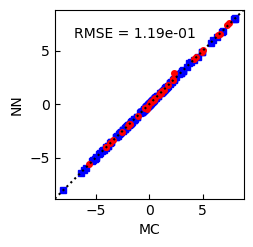

In [7]:
err = y_test.flatten() - y_test_pred.flatten()
rmse = np.sqrt(np.mean(err ** 2))

import matplotlib.pyplot as plt
fig = plt.figure(dpi=100, figsize=(2.5, 2.5))
ax = fig.gca()
ax.set_aspect('equal')
min_ = np.min(y_test.flatten().tolist() + y_test_pred.flatten().tolist() + y_train.flatten().tolist() + y_train_pred.flatten().tolist())
max_ = np.max(y_test.flatten().tolist() + y_test_pred.flatten().tolist() + y_train.flatten().tolist() + y_train_pred.flatten().tolist())
d = max_ - min_
r = [min_ - 0.05 * d, max_ + 0.05 * d]

ax.plot(y_train, y_train_pred, 'bs', ms=4)
ax.plot(y_test, y_test_pred, 'ro', ms=4)

ax.plot(r, r, 'k:')

ax.text(0.1, 0.85, "RMSE = %.2e" % rmse, transform=ax.transAxes)

ax.set_xlim(r)
ax.set_ylim(r)
# ax.set_title(pair_entry[idx])
ax.tick_params(which='both', direction='in')
ax.set_xlabel('MC')
ax.set_ylabel('NN')

In [8]:
import json


data = {}
data['train'] = y_train.flatten().tolist()
data['trainpred'] = y_train_pred.flatten().tolist()
data['test'] = y_test.flatten().tolist()
data['testpred'] = y_test_pred.flatten().tolist()

with open('train_nn.json', 'w') as fp:
    json.dump(data, fp, indent=4)

In [9]:
# build temperature programmed desorption data on this
import casadi as cas

RG = 8.314

theta_CO = cas.SX.sym('theta_CO', 1)
A = cas.SX.sym('A', 1)      # prefactor
Ea = cas.SX.sym('Ea', 1)    # activation barrier

beta = cas.SX.sym('beta', 1)    # linear ramp of tpd
T0 = cas.SX.sym('T0', 1)

t = cas.SX.sym('t', 1)

Tem = T0 + beta * t           # temperature
Enn1 = cas.SX.sym('Enn1', 1)   # nearest neighbor interaction energies

r1 = cas.exp(nn.initialize(cas.vertcat(theta_CO, Enn1 / Tem))) * theta_CO
# r1 = theta_CO
dCOdt = - A * cas.exp(-Ea * 1000 / (RG * Tem)) * r1

In [10]:
# integration
ode = dict(x=theta_CO, ode=dCOdt, p=cas.vertcat(beta, T0, Enn1, Ea, A), t=t)

# ode = cas.SXFunction("dae", cas.daeIn(x=theta_CO, p=cas.vertcat([beta, T0, Enn1, Ea, A]), t=t),
#                                     cas.daeOut(ode=dCOdt))

opts = {}
opts['abstol'] = 1e-12
opts['reltol'] = 1e-6
opts['disable_internal_warnings'] = True
opts['max_num_steps'] = 1e5

Fint = cas.integrator('Fint', 'cvodes', ode, opts)


In [11]:


def tpd_sim(times, param, x0=[1]):
    # forward simulation
    out = []  
    for i in range(len(times)):

        if i == 0:
            opts['t0'] = 0
        else:
            opts['t0'] = times[i - 1]
        opts['tf'] = times[i]
        Fint = cas.integrator('Fint', 'cvodes', ode, opts)
        Fsim = Fint(x0=x0, p=ks)
        if i == 0:
            out.append(x0)
        else:
            out.append(x0.full().tolist()[0])
        x0 = Fsim['xf']

    out = np.array(out)
    des = [out[i] - out[i+1] for i in range(len(out) - 1)]
    return des
    


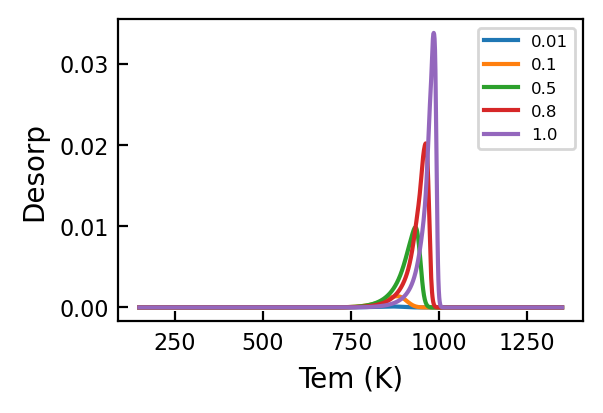

In [41]:
import matplotlib.pyplot as plt

ENN1 = -8
times = np.linspace(0, 400, 1000)
ks = [3, 150, ENN1, 150, 1e8]
x0 = [0.01]
tems = ks[0] * times + ks[1]

fig = plt.figure(figsize=(3, 2), dpi=200)
ax = fig.gca()
ax.plot(tems[:-1], tpd_sim(times, ks, [0.01]), label='0.01')
ax.plot(tems[:-1], tpd_sim(times, ks, [0.1]), label='0.1')
ax.plot(tems[:-1], tpd_sim(times, ks, [0.5]), label='0.5')
ax.plot(tems[:-1], tpd_sim(times, ks, [0.8]), label='0.8')
ax.plot(tems[:-1], tpd_sim(times, ks, [1]), label='1.0')
ax.tick_params(which='both', direction='in', labelsize=8)
ax.set_xlabel("Tem (K)", fontsize=10)
ax.set_ylabel("Desorp", fontsize=10)
ax.legend(fontsize=6)

In [42]:
from copy import copy
data = {}
data['ENN1'] = ENN1
for init in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
    tem, des = tems[:-1], tpd_sim(times, ks, [init])
    des = [float(d) for d in des]
    data['tem'] = tem
    data[init] = copy(des)

np.save('des_%.2f.npy' %ENN1, data)

In [14]:
len(X)

200